In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,precision_recall_curve

In [3]:
#data gathring
df1 =pd.read_csv('diabetes.csv')
df1

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,50,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,52,1
3,150,66,23,94,28.1,0.167,21,0
4,150,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [5]:
#linearity
df1.corr().loc['Outcome']

Glucose                     0.463051
BloodPressure               0.063007
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238700
Outcome                     1.000000
Name: Outcome, dtype: float64

In [6]:
x=df1.drop('Outcome',axis=1)
x

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148,50,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
2,183,64,0,0,23.3,0.672,52
3,150,66,23,94,28.1,0.167,21
4,150,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63
764,122,70,27,0,36.8,0.340,27
765,121,72,23,112,26.2,0.245,30
766,126,60,0,0,30.1,0.349,47


In [7]:
variance_inflation_factor(x.values,1)

14.556265936766165

In [9]:
for i in range (x.shape[1]):
    vif= variance_inflation_factor(x.values,i)
    print(f"VIF for {df1.columns[i] }==",vif)


VIF for Glucose== 16.51527169372247
VIF for BloodPressure== 14.556265936766165
VIF for SkinThickness== 4.004206694368847
VIF for Insulin== 2.0361811434296317
VIF for BMI== 18.439325007660848
VIF for DiabetesPedigreeFunction== 3.1868472975735873
VIF for Age== 9.969786527225263


In [11]:
#model train
x =df1.drop('Outcome',axis =1)
y=df1['Outcome']

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=10, stratify=y)

In [13]:
lg = LogisticRegression()
lg.fit(x_train,y_train)

LogisticRegression()

In [14]:
y_pred_train =lg.predict(x_train)
cn_matrix_training = confusion_matrix(y_train,y_pred_train)
cn_matrix_training

array([[329,  46],
       [ 85, 116]], dtype=int64)

<Figure size 576x432 with 0 Axes>

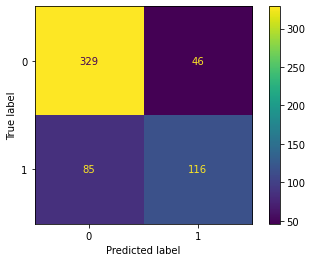

In [15]:
plt.figure(figsize=(8,6))
plot_confusion_matrix(lg,x_train, y_train)
plt.savefig('CNF_Matrix_test.png')
plt.show()

In [16]:
y_pred_test =lg.predict(x_test)
cn_matrix_testing = confusion_matrix(y_test,y_pred_test)
cn_matrix_testing

array([[110,  15],
       [ 22,  45]], dtype=int64)

<Figure size 576x432 with 0 Axes>

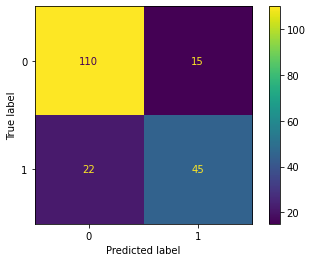

In [18]:
plt.figure(figsize=(8,6))
plot_confusion_matrix(lg,x_test, y_test)
plt.savefig('CNF_Matrix_test.png')
plt.show()

In [19]:
cls_report_train = classification_report(y_train,y_pred_train)
print("classification report on train dataset")
print(cls_report_train)

classification report on train dataset
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       375
           1       0.72      0.58      0.64       201

    accuracy                           0.77       576
   macro avg       0.76      0.73      0.74       576
weighted avg       0.77      0.77      0.77       576



In [20]:
cls_report_test = classification_report(y_test,y_pred_test)
print("classification report on train dataset")
print(cls_report_test)

classification report on train dataset
              precision    recall  f1-score   support

           0       0.83      0.88      0.86       125
           1       0.75      0.67      0.71        67

    accuracy                           0.81       192
   macro avg       0.79      0.78      0.78       192
weighted avg       0.80      0.81      0.80       192



In [21]:
Acc_train = accuracy_score(y_train,y_pred_train)
print("Accuracy_train :",Acc_train)
Acc_test =accuracy_score(y_test,y_pred_test)
print("Accuracy_test :",Acc_test)


Accuracy_train : 0.7725694444444444
Accuracy_test : 0.8072916666666666


In [22]:
# Training Data Evaluation

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix: \n",cn_matrix_training)
print("*"*40)
accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy is :",accuracy)
print("*"*40)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)
print("*"*40)


Confusion Matrix: 
 [[329  46]
 [ 85 116]]
****************************************
Accuracy is : 0.7725694444444444
****************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.79      0.88      0.83       375
           1       0.72      0.58      0.64       201

    accuracy                           0.77       576
   macro avg       0.76      0.73      0.74       576
weighted avg       0.77      0.77      0.77       576

****************************************


In [ ]:
Receiver operating charchertics curve

In [23]:
y_pred_train_prob =lg.predict_proba(x_train)
y_pred_train_prob

array([[0.79994308, 0.20005692],
       [0.36570486, 0.63429514],
       [0.90035173, 0.09964827],
       ...,
       [0.49815414, 0.50184586],
       [0.90943083, 0.09056917],
       [0.64038442, 0.35961558]])

In [24]:
fpr, tpr, thresh = roc_curve(y_train,y_pred_train_prob[:,1])


In [25]:
print(thresh.shape)
print(fpr.shape)
print(tpr.shape)

(183,)
(183,)
(183,)


In [26]:
cn_matrix_training

array([[329,  46],
       [ 85, 116]], dtype=int64)

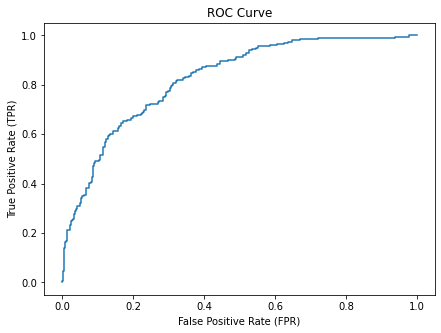

In [27]:
plt.figure(figsize=(7,5))
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title("ROC Curve")
plt.savefig("ROC_Curve.png")

In [28]:
roc_auc_score(y_train,y_pred_train_prob[:,1])# 0.7-0.95 good  :auc_score

0.8241459369817579

In [29]:
Glucose = 145.000
BloodPressure =55.000
SkinThickness = 38.000
Insulin = 0.000
BMI = 31.600
DiabetesPedigreeFunction = 0.753
Age = 55.000

test_array = np.array([Glucose, BloodPressure,SkinThickness, Insulin, BMI,
                      DiabetesPedigreeFunction, Age ], ndmin = 2)
test_array

pred_Class = lg.predict(test_array)[0]
print("Predicted CLass :",pred_Class) # Threshold = 0.5


Predicted CLass : 1


In [30]:
import pickle
with open("Diabetes_logistics.pkl",'wb') as f:
    pickle.dump(lg,f)